# **INTERPOLAÇÃO de NEWTOM**

A **Interpolação de Newton** chega no mesmo resultado que a Interpolação de Lagrange, porém utiliza de outros cálculos.

A primeira diferença é sobre as frações. Para encontrarmos as equações utilizando a soma dos $L_n(x)$ com seus respectivos $y_n$:

$P_n(x) = \sum\limits_{i=0}^{n}y_iL_i(x)$

Onde $L_n(x)$ é:

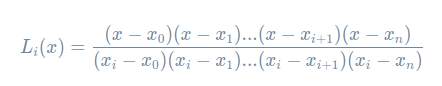




Porém na Interpolação de Newton o somatório é:

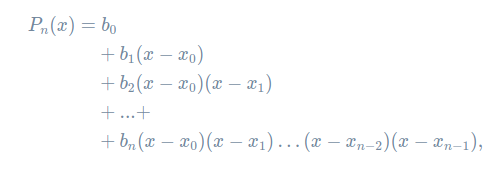

Os termos $b_i$ serão os coeficientes que iremos calcular. Uma diferença também notável é sobre as multiplicações dos termos $(x-x_i)$, podemos notar que não é mais uma fração, agora é só a multiplicação.

Para calcularmos os coeficientes $b_i$, conhecidos como ordem, fazemos: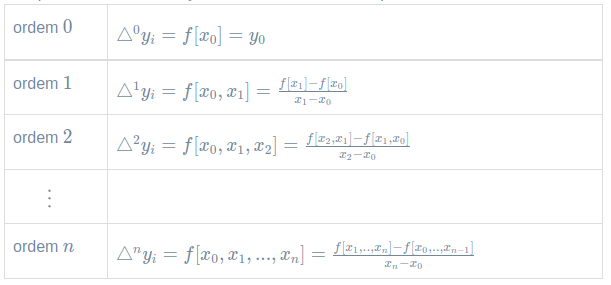

Os $\Delta^nyi$ é a diferença dividida. Para melhor visualização e entendimento vamos fazer um exemplo.


# **EXEMPLO**

A partir dos seguintes pontos, iremos encontrar o polinômio que passa pelos pontos.

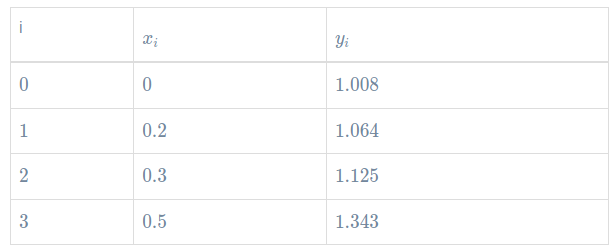

Como temos 4 pontos, o grau de $\Delta^nyi$ será de ordem 3, ou seja, vai até $\Delta^3yi$.

O conjunto $y_i$ se tornará o conjunto $\Delta^0yi$ e a tavela crescerá dessa forma:

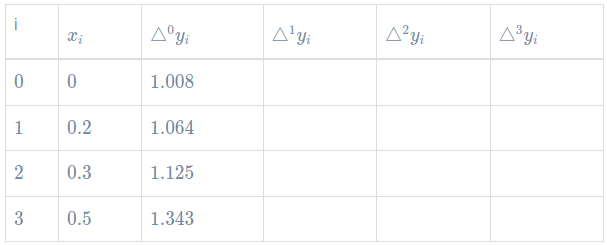

Para calcularmos as diferencas $\Delta^1y_i$ será:

$f[x_0, x_1] = \frac{y_1-y_0}{x_1-x_0}$

$f[x_1, x_2] = \frac{y_2-y_1}{x_2-x_1}$

$f[x_2, x_3] = \frac{y_3-y_2}{x_3-x_2}$

Percebemos que é uma forma bruta da primeira derivada (derivada de primeira ordem) com o acréscimo do ponto atual para o anterior. Por fim a tabela de $\Delta^1y_i$ fica:

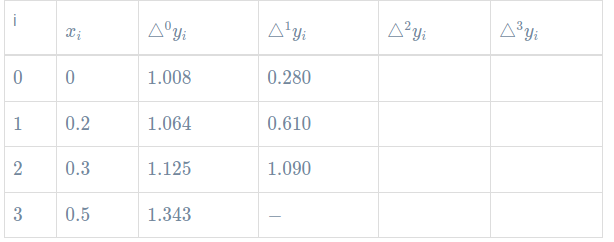

Para calcularmos o restante utilizamos da mesma lógica, porém de vez utilizarmos a coluna de ordem 0, iremos utilizar da última ordem calculada ($\Delta^1y_i$). Devemos também ficar atentos sobre o denominador dos próximos cálculos, pois as diferenças divididas usamos da coluna anterior:

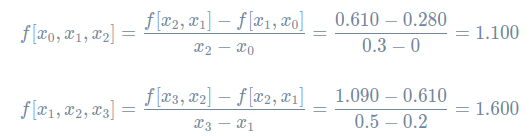

Podemos notar que os denominadores utilizados é sempre de $n+2$ do anterior. O da próxima ordem será de $n+3$, e assim por diante, sempre começando do $x_0$.


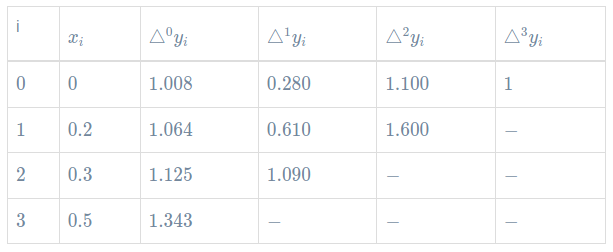

Agora para encontrarmos o polinômio basta pegar os primeiro termos das ordens, que serão os coeficientes $b_i$ do polinômio, e substituir os $x_1$:

$P_3(x) = 1,008 + 0,280(x-0) + 1,100(x-0)(x-0,2) + 1(x-0)(x-0,2)(x-0,3)$

# **POLINÔMIO ERRO**


O polinômio erro representa o erro da função encontrada pela Interpolação usada. 

**QUANDO SE CONHECE A FUNÇÃO**

Quando conhecemos a função, o erro do polinômio pode ser achado a partir da equação Resto do polinômio de Taylor:

$R(\tau) = \frac{f^{n}(\tau)}{3!} * (x-x_1)(x - x_2)...(x-x_n)$

Caso o polinômio achado pela Interpolação seja de grau dois, ou seja, tenha 3 pontos. A derivada $n$ será do terceiro Grau. As multiplicações é feito utilizando os pontos. 

E o valor de $\tau$ que será utilizado é o maior do intervalo, ou seja, quando encontrado a derivada da função $f^n(\tau)$ o intervalo de $x$ dado na questão vira $\tau$ qual do $x$ tiver o maior valor será substituído na função para obter o valor da função e realizar as multiplicações para achar o erro.

**QUANDO NÃO CONHECEMOS A FUNÇÃO**

Quando não conhecemos a função, a função $f^n(\tau)$ será substituído pelo primeiro valor da ordem que representa a derivada. Exemplo: se a funçaõ for de segundo grau, iremos utilizar o valor encontrado da diferença dividida $\Delta^3y_i$.

$P_e(x) = \Delta^3y_i (x-x_1)(x-x_2)...(x-x_n)$

# **QUESTÃO**

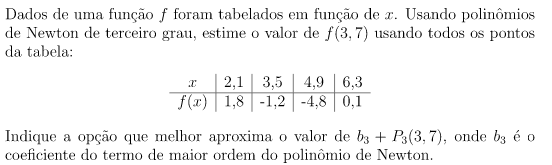

Importando as bibliotecas para os cálculos

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.array([[10], [18], [29], [38], [41], [49]])
y = np.array([[np.log10(10)], [np.log10(18)], [np.log10(29)], [np.log10(38)], [np.log10(41)], [np.log10(49)]])

In [4]:
def coefs(x,y):
    dim = np.shape(x)

    d = np.zeros((dim[0],dim[0]-1))
    d = np.concatenate((y, d),1)
    #print(d)

    for i in range(1, dim[0]):
        for j in range(0, dim[0]-i):
            #print(f'i: {i} | j: {j}')
            d[j][i] = (d[j+1][i-1] - d[j][i-1]) / (x[j+i][0] - x[j]+[0])

    #print("\n",d)

    return d
#============================================================
def interpolacaoNewton(a,x,cfs):
  S = cfs[0][0]
  dim = np.shape(x)
  for i in range(1, dim[0]):
    prod = 1
    for j in range(0 ,i):
      prod = prod * (a - x[j][0])
    
    S += cfs[0][i]*prod

  return S
#============================================================
def PolErro(cfs, x, a):
  dim = np.shape(x)
  if dim[0] < 3:
    return 'ERRO'
  else:
    S = 0
    f3 = cfs[0][3]
    produtorio = 1

    for i in range(0, dim[0]):
      produtorio = produtorio * (a-x[1])

    S = f3 * produtorio

    return S

In [6]:
p = np.power(10, 1.2192)

cfs = coefs(x,y)
P = interpolacaoNewton(p, x, cfs)

print(f'valor do polinômio em {p}: {P}')
print(f'Soma b3 + P{p}: {P + cfs[0][3]}')

valor do polinômio em 16.565326493180184: 1.2187057357121096
Soma b3 + P16.565326493180184: 1.2187199877125405


# **MINIESTE 24/03/2021**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def coefs(x,y):
    dim = np.shape(x)

    d = np.zeros((dim[0],dim[0]-1))
    d = np.concatenate((y, d),1)
    #print(d)

    for i in range(1, dim[0]):
        for j in range(0, dim[0]-i):
            #print(f'i: {i} | j: {j}')
            d[j][i] = (d[j+1][i-1] - d[j][i-1]) / (x[j+i][0] - x[j]+[0])

    print("\n",d)

    return d
#============================================================
def interpolacaoNewton(a,x,cfs):
  S = cfs[0][0]
  dim = np.shape(x)
  for i in range(1, dim[0]):
    prod = 1
    for j in range(0 ,i):
      prod = prod * (a - x[j][0])
    
    S += cfs[0][i]*prod

  return S
#============================================================
def PolErro(cfs, x, a):
  dim = np.shape(x)
  if dim[0] < 3:
    return 'ERRO'
  else:
    S = 0
    f3 = cfs[0][2]
    produtorio = 1

    for i in range(0, dim[0]):
      produtorio = produtorio * (a-x[1])

    S = f3 * produtorio

    return S

In [ ]:
x = np.array([[-4.], [-3.], [5.]])
y = np.array([[51.], [33], [33]])

In [ ]:
p = 2

cfs = coefs(x, y)
P = interpolacaoNewton(p, x, cfs)

print(f'valor do polinômio em {p}: {P}')
print(f'Soma b2 + P{p}: {P + cfs[0][2]}')


 [[ 51. -18.   2.]
 [ 33.   0.   0.]
 [ 33.   0.   0.]]
valor do polinômio em 2: 3.0
Soma b2 + P2: 5.0
